## <center> Polytechnique Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8008 – Prétraitement de données <br> . <br> TP1  - Analyse descriptive des données<br>  Hiver 2025 <br> . <br> 20 janvier 2025 </center>

## Introduction

Le TD1 porte sur l'analyse descriptive de données.  Nous survolons l'utilisation de fonctions de base de Pandas et de l'analyse de données numériques et de leur visualisation.

Les données du fichier <b> ntsb-accidents.csv </b> proviennent d'une base de données sur les accidents d’aviation provenant du <a href = https://carol.ntsb.gov> National Transportation Safety Board </a>. Nous nous en inspirerons pour le travail des TPs de cette session.

Les champs du fichier de données <b> ntsb-accidents.csv </b> sont les suivants :

- **event_id** : Identifiant unique de l'événement (souvent un code de référence pour suivre chaque cas).
- **ntsb_make** : Fabricant de l'appareil impliqué dans l'événement (exemple : BELL, ROBINSON).
- **ntsb_model** : Modèle spécifique de l'appareil (exemple : R22 BETA, R44).
- **ntsb_number** : Code d'identification de l'incident assigné par la NTSB.
- **year** : Année où l'événement a eu lieu.
- **date** : Date et heure exactes de l'événement (année/mois/jour heure:minute:seconde).
- **city** : Ville où l'événement s'est produit.
- **state** : État ou province où l'événement s'est produit.
- **country** : Pays où l'événement a eu lieu.
- **total_fatalities** : Nombre total de décès associés à l'incident.
- **latimes_make** : Fabricant simplifié utilisé dans les rapports (exemple : BELL, ROBINSON).
- **latimes_model** : Modèle simplifié utilisé dans les rapports (exemple : R22, 369).
- **latimes_make_and_model** : Combinaison du fabricant et du modèle pour décrire l'appareil de manière concise (exemple : BELL 407, ROBINSON R44).



Les librairies python qui seront à utiliser pour ce TP sont les suivantes:
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)




In [2]:
import pandas as pd

## 1. Analyse des données numériques


### Q1
À l'aide de Pandas, chargez les données dans une variable nommée 'df'. Quelle est la dimension de 'df'? Combien y a-t-il de lignes et de colonnes? <b>(2 points)</b>

In [3]:
#TODO: Chargement et affichage de df
df = pd.read_csv('ntsb-accidents.csv') 

In [131]:
#TODO: Complétez ce code afin d'afficher les bonnes informations dans les "print".

print(f'la dimension de df : {df.shape} \n'
      f'nombre de lignes : {len(df)} \n'
      f'nombre de colonnes : {len(df.columns)}')



la dimension de df : (163, 13) 
nombre de lignes : 163 
nombre de colonnes : 13


### Q2
Quelle est l'intervalle d'années et l'ensemble des fabricants et modèles d'hélicoptères compris dans le jeu de données?<b>(1 point)</b>

In [132]:
#TODO:
print(f"intervalle d'année [{min(df['year'])}  , {max(df['year'])}] ")
fabricant = set(df['ntsb_model'])
print(f"ensemble des fabricants : {set(df['ntsb_make'])}")
print(f"ensemble des modèles : {set(df['ntsb_model'])}")



intervalle d'année [2006  , 2016] 
ensemble des fabricants : {'SCHWEIZER', 'AIRBUS', 'MCDONNELL DOUGLAS HELICOPTER', 'EUROCOPTER DEUTSCHLAND GMBH', 'EUROCOPTER', 'BELL HELICOPTER', 'EUROCOPTER FRANCE', 'MCDONNELL DOUGLAS HELI CO', 'BELL HELICOPTER TEXTRON CANADA', 'ROBINSON HELICOPTER COMPANY', 'ROBINSON HELICOPTER', 'AIRBUS HELICOPTERS (EUROCOPTE', 'AMERICAN EUROCOPTER LLC', 'SIKORSKY', 'AEROSPATIALE', 'AIRBUS HELICOPTERS', 'BELL', 'ROBINSON', 'AMERICAN EUROCOPTER CORP', 'MCDONNELL DOUGLAS', 'BELL HELICOPTER TEXTRON', 'HUGHES', 'MD HELICOPTERS INC', 'AGUSTA SPA', 'AIRBUS HELICOPTERS INC'}
ensemble des modèles : {'206', '407', '206L1', 'S-76C', '206L 1', '369', 'AS-350-D', '206L-3', 'R-44', 'AS350', 'AS 350 B3', 'R44', 'AS 350 BA', '206B', 'S-76A++', 'EC 135 T2+', 'R22 BETA II', '369D', 'EC 135 P2', 'R22', '369E', 'R44 II', 'AS350-B2', 'A109E', 'R22 BETA', 'EC135', 'AS350B3', 'AS350 B2', 'EC-130-B4', '206L-4', '369FF', '369A', '269C 1', 'EC-135P1', 'AS-350-B3', 'AS-350', '269C', 'AS350

### Q3
Combien de décès y a-t-il en moyenne? <b>(1 point)</b>

In [20]:
#TODO:
print(f"nombre moyen de décès {round(df['total_fatalities'].mean() ,3) }")


nombre moyen de décès 2.061


### Q4
Combien d'**accidents** y a-t-il eu pour chaque combinaison de fabricant et modèle d'hélicoptère? Créez un tableau de fréquence du nombre d'accidents par combinaison de fabricant et modèle.  <b>(3 points)</b>


In [27]:
#TODO:
df.groupby(['ntsb_make', 'ntsb_model']).size().reset_index(name='accident_count')

,ntsb_make,ntsb_model,accident_count
0,AEROSPATIALE,AS-350-D,1
1,AEROSPATIALE,AS350,1
2,AEROSPATIALE,AS350B,1
3,AEROSPATIALE,AS350BA,2
4,AGUSTA SPA,A109E,2
...,...,...,...
66,SCHWEIZER,269C,1
67,SCHWEIZER,269C 1,1
68,SCHWEIZER,269C-1,2
69,SIKORSKY,S-76A++,1


### Q5
Déterminez la moyenne, la médiane et l'écart-type du nombre de décès. Dans un premier temps, fournissez les statistiques avec AIRBUS 350.  Puis, dans un second temps, fournissez les statistiques avec ROBINSON R44.<b>(3 points)</b>

In [138]:
# Calcul des statistiques pour AIRBUS 350
airbus_deaths = df[df['latimes_make_and_model'] == 'AIRBUS 350']['total_fatalities']

print(f"Avec AIRBUS 350 : \n"
      f"moyenne : {round(airbus_deaths.mean() , 3) } "
      f"médiane : {airbus_deaths.median()} "
      f"écart type : {round(airbus_deaths.std(), 3) } \n ")

# Calcul des statistiques pour ROBINSON R44
robinson_deaths = df[df['latimes_make_and_model'] == 'ROBINSON R44']['total_fatalities']

print(f"Avec ROBINSON R44 : \n"
      f"moyenne : {round(robinson_deaths.mean(), 3) } "
      f"médiane : {robinson_deaths.median()} "
      f"écart type : {round(robinson_deaths.std(),3) }")

Avec AIRBUS 350 : 
moyenne : 2.793 médiane : 3.0 écart type : 1.634 
 
Avec ROBINSON R44 : 
moyenne : 1.868 médiane : 2.0 écart type : 0.906


### Q6
Combien d’accidents ont enregistré plus d’un décès?
Combien de décès se sont produits en Californie en 2015? <b>(1 point)</b>

In [136]:
#TODO:
print(f" nombre d'accidents avec plus d'un décès : {len(df[df['total_fatalities'] > 1 ])}") 
print(f" nombre de décès en californie en 2015: {df[(df['state'] == 'CA') & (df['year'] == 2015)]['total_fatalities'].sum()}") 

 nombre d'accidents avec plus d'un décès : 89
 nombre de décès en californie en 2015: 6


## 2. Visualisation de données

In [137]:
import matplotlib.pyplot as plt

### Q7
Affichez le nombre de décès par année. Nommez vos axes et donnez un titre à votre graphique. Qu’observez-vous? Quelle année marque le plus de décès? Quelle année marque le moins?<b>(3 points)</b>

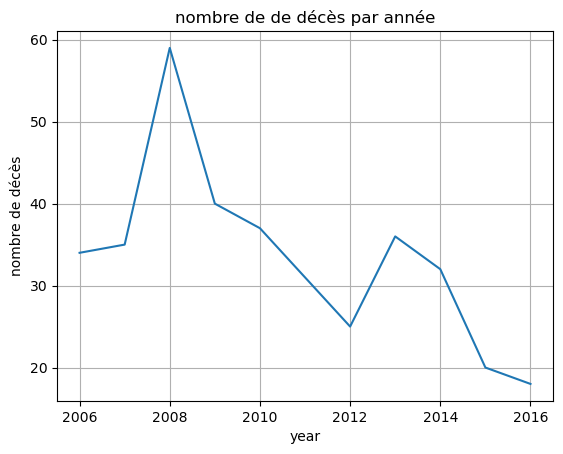

In [112]:
dec_annees = df.groupby('year')['total_fatalities'].sum()
plt.plot(dec_annees.index ,  dec_annees.values)
plt.xlabel('year')
plt.ylabel('nombre de décès')
plt.title('nombre de de décès par année')
plt.grid(True)
plt.show()


Il semble que le nombre de décès par année diminue progressivement, sûrement grâce à l'amélioration des normes de sécurité.L'année 2008 semble être la plus élevée en terme de décès. L'année 2016 semble être la moins élevée en terme de décès. 

### Q8
En utilisant la fonction subplot de matplotlib:

1) Affichez le nombre d'accidents par année dans un diagramme à barres.

2) Affichez le nombre de décès par année dans un diagramme à barres.

Nommez vos axes et donnez un titre à votre graphique.
En comparant ceux-ci, observez-vous une relation entre le nombre de décès et d'accidents? Pouvez-vous justifier la cause du nombre de décès minimal de l'année évoquée dans la question 7?  <b>(5 points)</b>

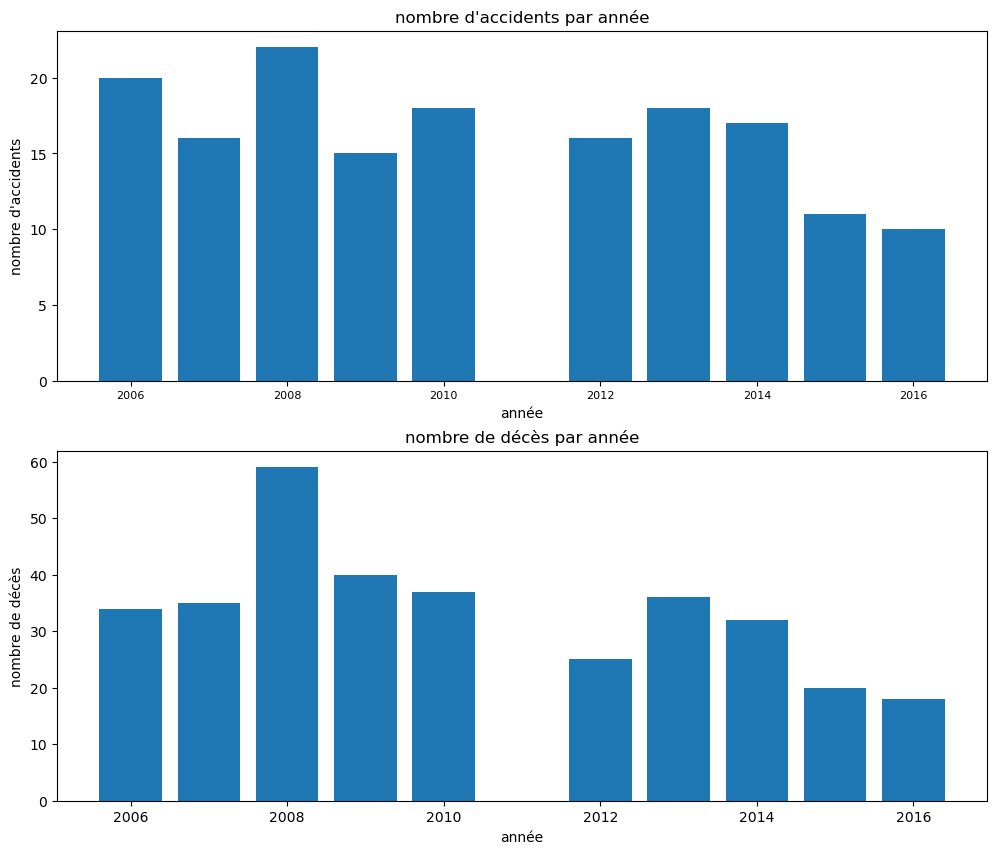

In [109]:
#TODO: Filtrez votre dataframe

#TODO: Partie 1

acc_annees = df.groupby(['year']).size()

plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)

plt.bar(acc_annees.index , acc_annees.values )
plt.xlabel('année') 
plt.ylabel("nombre d'accidents")
plt.title("nombre d'accidents par année")

plt.subplot(2,1,2)
plt.bar(dec_annees.index , dec_annees.values )
plt.xlabel('année') 
plt.ylabel("nombre de décès")
plt.title("nombre de décès par année")
plt.show()
#TODO: Partie 2



## 3. LIVRABLES
Vous devez remettre sur Moodle un fichier compressé .zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel implanté avec les librairies minimales demandées pour ce TP (Python, Pandas, Matplotlib). Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière. Tous vos résultats doivent être reproductibles avec le code dans le notebook. *Attention, en aucun cas votre code ne doit avoir été copié de d'ailleurs.*

2) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf (obtenu via latex ou imprimé en pdf avec le navigateur). Assurez-vous que le PDF est entièrement lisible. [Tutoriel youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

ATTENTION: assurez-vous que votre fichier compressé .zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.) <b>(1 point)</b>
3. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter avec d'autres équipes. Cependant, vous ne pouvez en aucun cas incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

### Conversion en PDF sur Google Colab

In [ ]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Assurez vous d'avoir téléchargé le TP complété en notebook sur votre ordinateur, puis importé ce fichier dans le répertoire "content" avant de rouler la ligne suivante.

In [ ]:
!jupyter nbconvert --to pdf /content/TP1.ipynb